You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack

In [179]:
# Importing al the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [181]:
# Getting the info obf the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [182]:
#Checking he null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This data set doesn't have any null values

In [183]:
# Checking for duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [184]:
df.drop_duplicates(inplace=True)

In [185]:
# checking the shap after droppping the duplicates
df.shape

(302, 14)

In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [187]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Visualization

From the below graph we can see people having disease is sightly more in our dataset


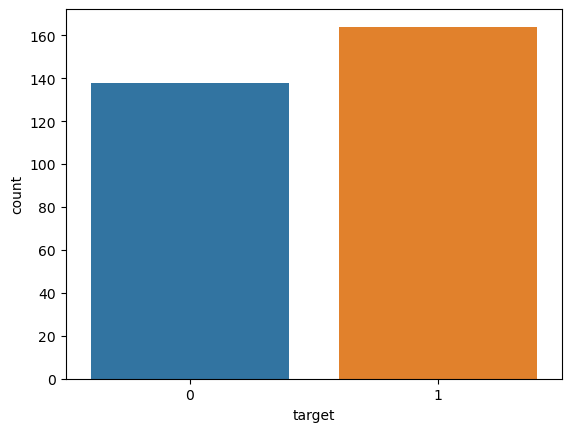

In [188]:
# Number of patients having a heart disease vs not having
sns.countplot(x='target',data=df)

print("From the below graph we can see people having disease is sightly more in our dataset")

 From the below graph people in the age bin 40 to 55 is having more diseases and after 60 there is less number of people having heart disease


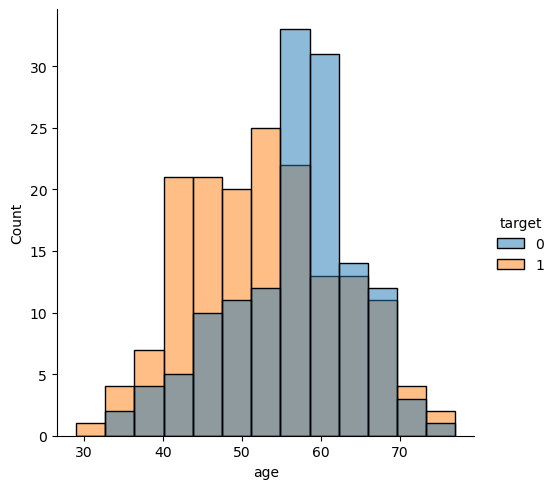

In [189]:
sns.displot(x='age',data=df,hue='target')
print(" From the below graph people in the age bin 40 to 55 is having more diseases and after 60 there is less number of people having heart disease")

<Axes: >

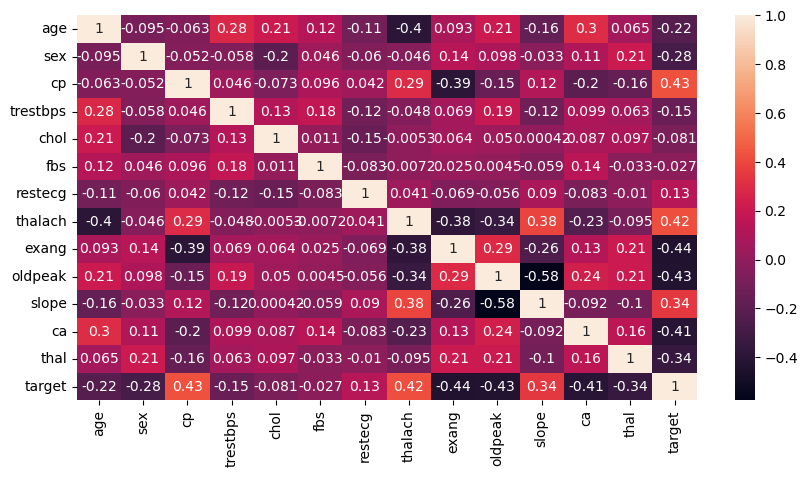

In [190]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

 From both the graphs men is having more heart disease then women


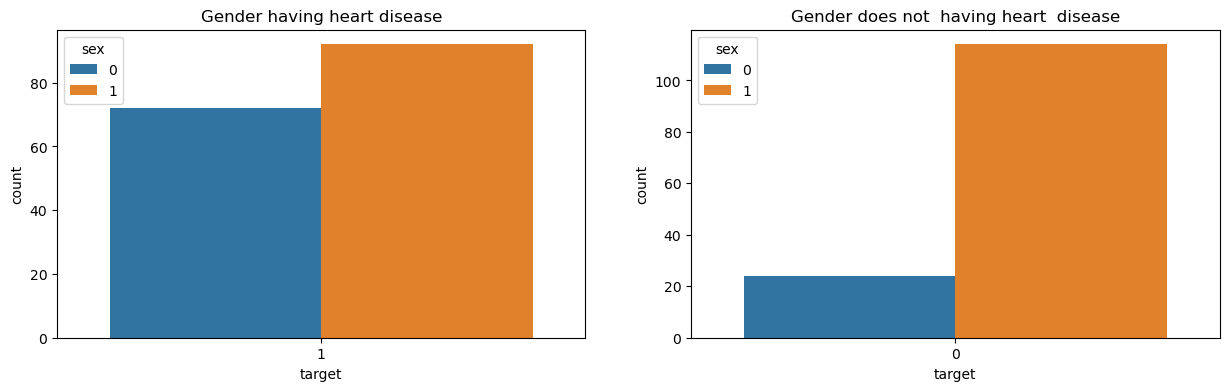

In [191]:
temp1 =  df[df['target']==1]
temp2 =  df[df['target']==0]

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x='target',data=temp1,hue='sex')
plt.title("Gender having heart disease")

plt.subplot(1,2,2)
sns.countplot(x='target',data=temp2,hue='sex')
plt.title("Gender does not  having heart  disease")


print(" From both the graphs men is having more heart disease then women")

Feature engineering

In [192]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

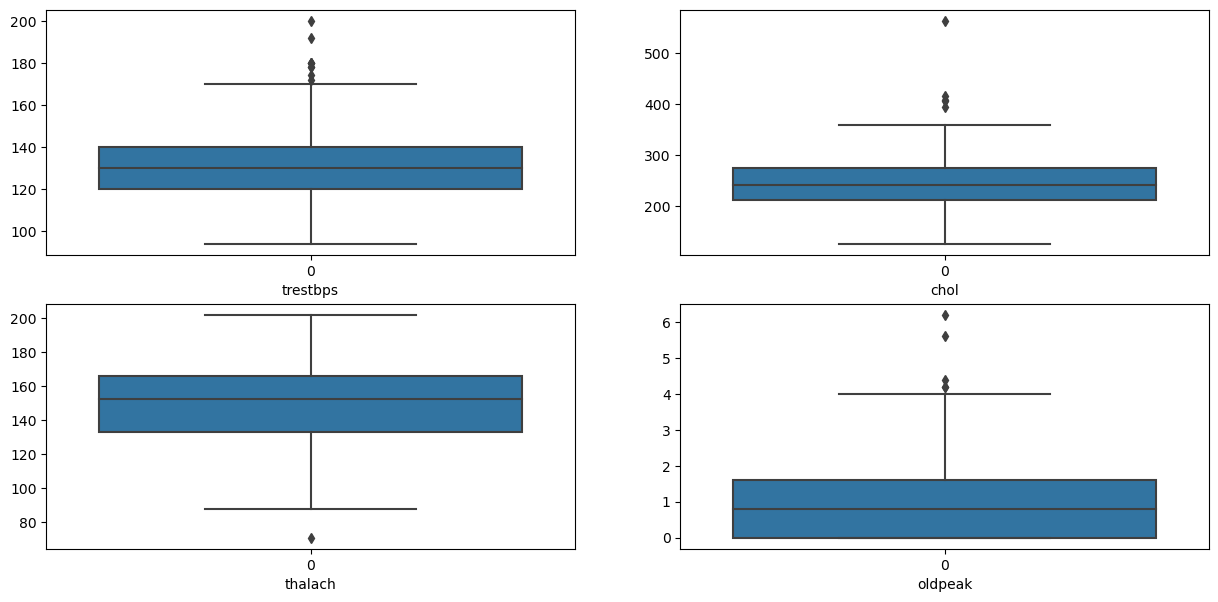

In [193]:
# Checking for The ouliers
l= ['trestbps', 'chol', 'thalach','oldpeak']
plt.figure(figsize=(15,7))
c=1
for i in l:
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.xlabel(i)
    c=c+1
plt.show()

In [194]:
# Removing the ouliers
l= ['trestbps', 'chol', 'thalach','oldpeak']
for i in l:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr  = q3 -  q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]


df.shape

(283, 14)

In [195]:
print(f"302 - 283 = {302-283}")
print(f"We lost around {302-283} columns ") 

302 - 283 = 19
We lost around 19 columns 


<Axes: >

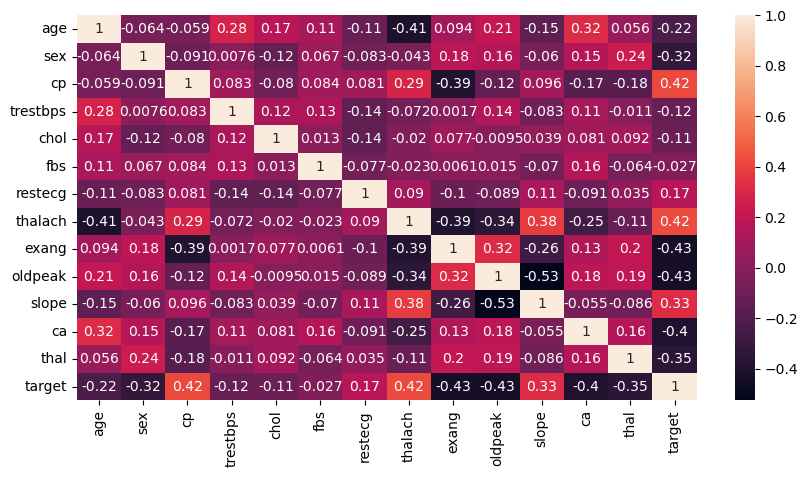

In [196]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [197]:
#Feature Importance

df1 = df.drop(columns=['target'])
vif_data = pd.DataFrame()
vif_data['feature'] = df1.columns
vif_data['vif_values'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

vif_data

,feature,vif_values
0,age,41.111984
1,sex,3.852242
2,cp,2.439460
3,trestbps,67.476545
4,chol,32.336865
5,fbs,1.248970
6,restecg,2.139787
7,thalach,44.467349
8,exang,2.022819
9,oldpeak,2.903371


In [198]:
# After removing age my model is performing  well 
df1.drop(columns=['age'],inplace=True)

Splitting the data set for train and test

In [199]:
# Separating independent and dependent variables
x = df1
y = df['target']

# splitting the train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

print(x_train.columns)

# Standardize the dataset
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


MODEL BUILDING

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.85      0.88      0.86        50

    accuracy                           0.84        85
   macro avg       0.83      0.83      0.83        85
weighted avg       0.83      0.84      0.83        85



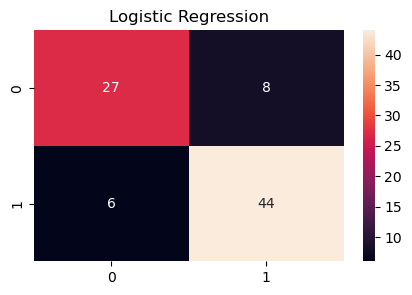

In [200]:
# Creating the model
model = LogisticRegression()

# Fitting the model
model.fit(x_train,y_train)

# Predict the target using the model
y_predict = model.predict(x_test)

# Confusion matix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.title("Logistic Regression")

print(classification_report(y_test,y_predict))

RandomForestClassifier

In [201]:
# Identifying the best parameter for random forest
forest_params = [{'n_estimators':list(range(10,20)),'max_depth':list(range(5,10)),'max_features':list(range(0,10))}]
rf_model = RandomForestClassifier()
gscv = GridSearchCV(rf_model,forest_params,cv=10,scoring='accuracy')
gscv.fit(x_train,y_train)

print(gscv.best_params_)
print(gscv.best_score_)

{'max_depth': 5, 'max_features': 6, 'n_estimators': 14}
0.8589473684210527


              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.82      0.84      0.83        50

    accuracy                           0.80        85
   macro avg       0.79      0.79      0.79        85
weighted avg       0.80      0.80      0.80        85



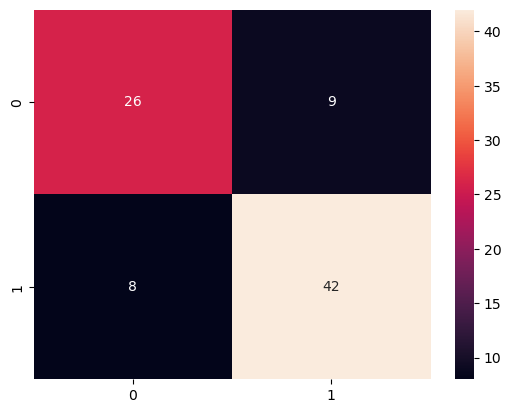

In [202]:
# Bulding the model and predicting
rf_model = RandomForestClassifier(max_depth=gscv.best_params_.get('max_depth'),max_features=gscv.best_params_.get('max_features'),n_estimators=gscv.best_params_.get('n_estimators'))
rf_model.fit(x_train,y_train)
y_predict = rf_model.predict(x_test)

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
print(classification_report(y_test,y_predict))


PREDICTING FOR SPECIFIC INPUT

In [203]:
df2 = df1.copy().reset_index()
df2.drop(columns=['index'],inplace=True)

In [204]:
inp = 220
n  = std_scaler.transform([df2.iloc[inp,:]])
print(df.iloc[inp,:])

rf_model.predict(n)

age          55.0
sex           1.0
cp            0.0
trestbps    160.0
chol        289.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         1.0
oldpeak       0.8
slope         1.0
ca            1.0
thal          3.0
target        0.0
Name: 232, dtype: float64


array([0], dtype=int64)